# Filtrado No-Trivial

Filtrado tradicional con convolución, simplemente es hacer la convolución del kernel con la imagen.

<p align="center">
<img width="600" height="200" src="Images/Image_noise.png"/>
</p>


<p align="center">
<img width="600" height="200" src="Images/Image_noise2.png"/>
</p>

<p align="center">
<img width="600" height="200" src="Images/Image_noise3.png"/>
</p>

## Filtro Blur

Problema con los borderes, elimina el ruido pero difumina la imagen.

In [1]:
import cv2
import numpy as np
from skimage import io, img_as_float
import matplotlib.pyplot as plt

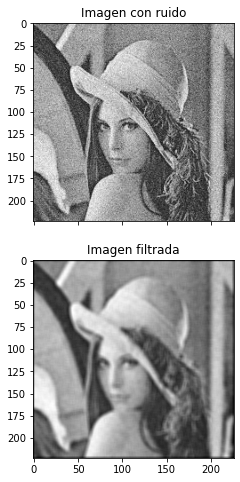

In [30]:
img = cv2.imread('Images/lena_noise.jpg', 0)

kernel = np.ones((5,5), np.float32)/25 #Kernel normalizado
img_blur = cv2.filter2D(img, -1, kernel, borderType=cv2.BORDER_CONSTANT)

fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(6, 8))
axs[0].set_title('Imagen con ruido')
axs[0].imshow(img, cmap='gray')

axs[1].set_title('Imagen filtrada')
axs[1].imshow(img_blur,  cmap='gray')
plt.show()

## Filtrado Bilateral

Uno de los filtros para eliminar ruido (*denoising filter*) más usados. Este es un filtro preservador de bordes, y lo que hace es reemplazar el valor de cada pixel por el promedio de los píxeles cercanos (vecinos).

$$BF[I]_p = \frac{1}{W_p}\sum_{q\in S}G_{\sigma_s}(||p-q||)G_{\sigma_r}(||I_p-I_q||)I_q$$ 

Donde,

$$W_p = \sum_{q\in S}G_{\sigma_s}(||p-q||)G_{\sigma_r}(||I_p-I_q||)$$ 

Teniendo en cuenta que:
* $G_{\sigma_r}$ es el del núcleo (kernel) de rango para suavizar las diferencias en las intensidades, generalmente es una función Gaussiana.
* $G_{\sigma_s}$ es el del núcleo (kernel) espacial para suavizar las diferencias en las coordenadas, generalmente es una función Gaussiana. 
* $BF[I]_p$ es la imagen filtrada.
* $I_q$ corresponde a la imagen de entrada


Se combinan los dos filtros obteniendo un nuevo kernel que suavisa la señal eliminando el ruido.


<p align="center">
<img width="600" height="200" src="Images/Gaussian.png"/>
</p>
   
<p align="center">
<img width="600" height="200" src="Images/BilateralFilter.png"/>
</p>

### ¿Comó preserva los bordes?
Como se menciona el filtrado bilateral hace el filtrado gasussiano en el espacio, pero también hace otro filtrado Gaussiano de diferencia entre pixeles. En otras palabras, el primer filtro Gaussiano en el espacio hace que solo los pixeles cercanos sean considerados, mientras que el filtro Gaussiano de diferencia en intensidad hace que solo los pixeles con intensidades similares sean considerados. Esto resulta en la preservacion de los bordes, ya que estos tendrán una mayor variación de intensisdad y no se verán alterados. 

In [14]:
import cv2
import numpy as np
from skimage import io, img_as_float
import matplotlib.pyplot as plt

[]

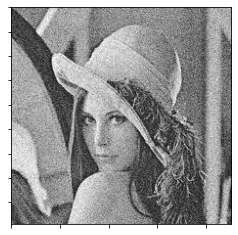

In [41]:
#Lectura de la imagen
img = cv2.imread('Images/lena_noise.jpg', 0)
plt.imshow(img, cmap='gray')
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().axes.xaxis.set_ticklabels([])

### Filtrado utilizando OpenCV

```
dst = cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])
```

La señal de entrada debe ser de punto flotante o un 8-bits, de 1 o 3 canales.

* **d:** diametro de cada pixel vecino que se esta utilizando durante el filtrado. (Se puede ver como el tamaño del kernel).

* **sigmaColor:** Desviasión estandar para el filtro de intensidad.

* **sigmaSpace:** Desviasión estandar para el filtro de espacio.

* **borderType:** Forma de tratar los bordes, si se usará padding o si se recortará la imagen de salida

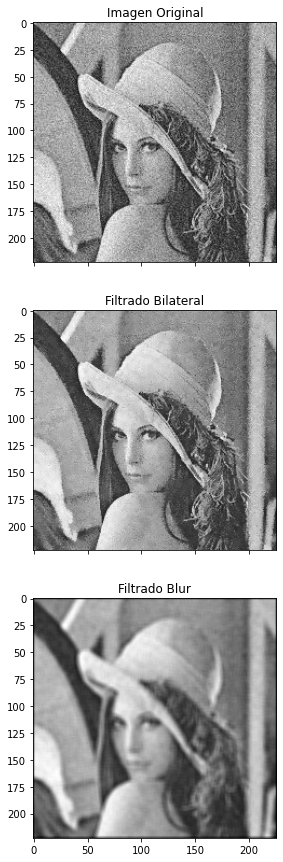

In [50]:
bilateral_using_cv2 = cv2.bilateralFilter(img,7, 20, 20, borderType=cv2.BORDER_CONSTANT)

fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(10, 15))
axs[0].set_title('Imagen Original')
axs[0].imshow(img, cmap='gray')

axs[1].set_title('Filtrado Bilateral')
axs[1].imshow(bilateral_using_cv2, cmap='gray')

axs[2].set_title('Filtrado Blur')
axs[2].imshow(img_blur,  cmap='gray')
plt.show()

## Filtrado Non-Local Means

Uno de los filtros para eliminar ruido (*denoising filter*) más usados. Este es un filtro preservador de bordes, y lo que hace es reemplazar el valor de cada pixel por el promedio de los píxeles cercanos (vecinos).

$$NL[v](i) = \sum_{j\in I}\omega(i,j)v(j)$$ 

Donde $\omega$ corresponde a la familia de pesos que dependen de la similitud entre los vecinos, mientras más similar es el vecino de un píxel específico mayor peso tendra el vecino sobre la modificación del píxel dado.

In [16]:
#Genearal imports
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float

#OpenCV import
import cv2

#Skimage non-mean filter import
from skimage.restoration import denoise_nl_means, estimate_sigma

[]

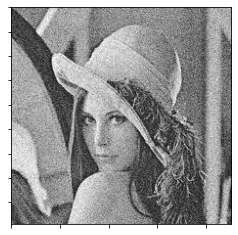

In [17]:
#Lectura de la imagen
img = cv2.imread('Images/lena_noise.jpg', 0)
plt.imshow(img, cmap='gray')
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().axes.xaxis.set_ticklabels([])

### Filtrado Non-Local Mean utilizando scikit-image

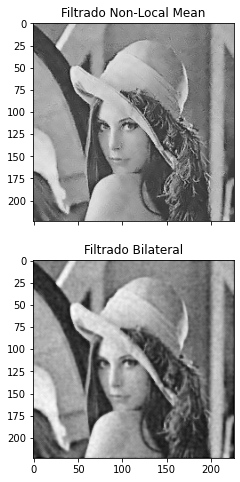

In [26]:
sigma_est = np.mean(estimate_sigma(img, multichannel=False))
img_nlm = denoise_nl_means(img, 
                               h=1.*sigma_est, 
                               fast_mode=True, 
                               patch_size=5,
                               patch_distance=3,
                               multichannel=False)

fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(6, 8))
axs[0].set_title('Filtrado Non-Local Mean')
axs[0].imshow(img_nlm, cmap='gray')

axs[1].set_title('Filtrado Bilateral')
axs[1].imshow(bilateral_using_cv2,  cmap='gray')
plt.show()

### Filtrado Non-Local Mean utilizando OpenCV

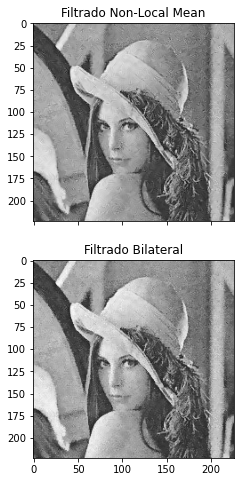

In [51]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img_nlm_cv = cv.fastNlMeansDenoising(img,None,1.*sigma_est, 3, 5)

fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(6, 8))
axs[0].set_title('Filtrado Non-Local Mean')
axs[0].imshow(img_nlm_cv, cmap='gray')

axs[1].set_title('Filtrado Bilateral')
axs[1].imshow(bilateral_using_cv2,  cmap='gray')
plt.show()

## Filtrado Homomórfico